In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
set0 = pd.read_csv('previous_application.csv')

In [3]:
test1 = set0[['NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE','RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT','NFLAG_INSURED_ON_APPROVAL']]

In [4]:
V = pd.pivot_table(test1, index = 'NAME_CONTRACT_TYPE', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])

S = pd.pivot_table(test1, index = 'NAME_CONTRACT_STATUS', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])



Text(0.5, 1.0, 'CONTRACT STATUS')

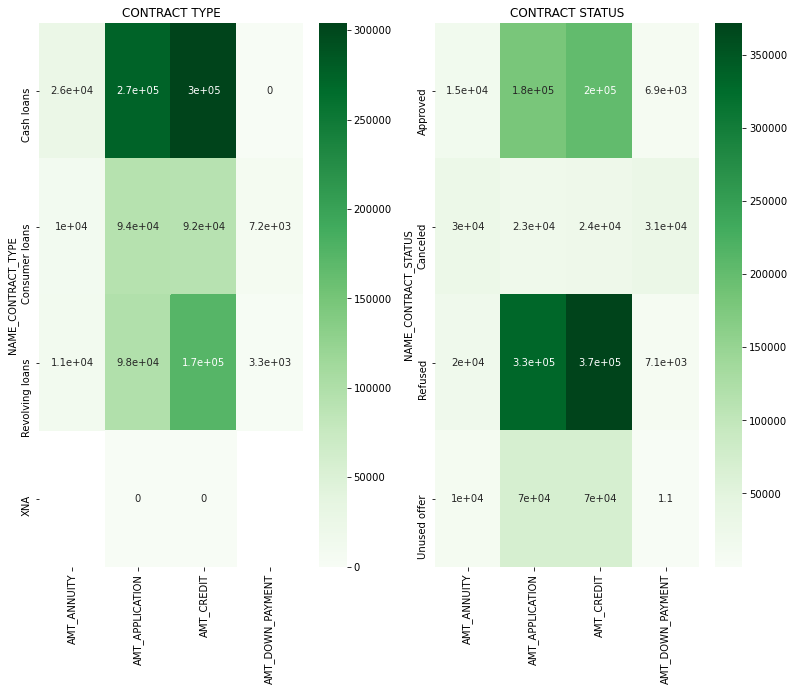

In [5]:
axes = plt.figure(figsize = (13,10))
plt.subplot(1,2,1)
ax=sns.heatmap(V, cmap='Greens', annot = True)
ax.set_title('CONTRACT TYPE')
plt.subplot(1,2,2)
ax=sns.heatmap(S, cmap='Greens', annot = True)
ax.set_title('CONTRACT STATUS')

Most loans are cash loans, the second highest category is revolving loans. And Most loans are Refused. Very few
loans are not used, even less are cancelled.

In [6]:
corr_3 = test1.corr()
corr3_df = corr_3.where(np.triu(np.ones(corr_3.shape),k=1).astype(np.bool))
corr3_df = corr3_df.unstack().reset_index()
corr3_df
corr3_df.columns = ['VAR1','VAR2','CORRELATION']
corr3_df.dropna(subset = ['CORRELATION'],inplace=True)
corr3_df
corr3_df['ABS_CORR'] = corr3_df['CORRELATION'].abs()
corr3_df = corr3_df.sort_values(by='ABS_CORR', ascending = False)


corr3_df.head(10) 

,VAR1,VAR2,CORRELATION,ABS_CORR
49,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884,0.999884
50,AMT_GOODS_PRICE,AMT_CREDIT,0.993087,0.993087
25,AMT_CREDIT,AMT_APPLICATION,0.975824,0.975824
48,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895,0.820895
24,AMT_CREDIT,AMT_ANNUITY,0.816429,0.816429
12,AMT_APPLICATION,AMT_ANNUITY,0.808872,0.808872
121,CNT_PAYMENT,AMT_APPLICATION,0.680630,0.680630
122,CNT_PAYMENT,AMT_CREDIT,0.674278,0.674278
124,CNT_PAYMENT,AMT_GOODS_PRICE,0.672129,0.672129
103,DAYS_DECISION,RATE_INTEREST_PRIVILEGED,0.631940,0.631940


^ Top 10 correlation pairs for this data set

In [7]:
X= pd.pivot_table(test1, index = 'CODE_REJECT_REASON', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])

Y = pd.pivot_table(test1, index = 'NAME_CASH_LOAN_PURPOSE', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])




Text(0.5, 1.0, 'LOAN PURPOSE')

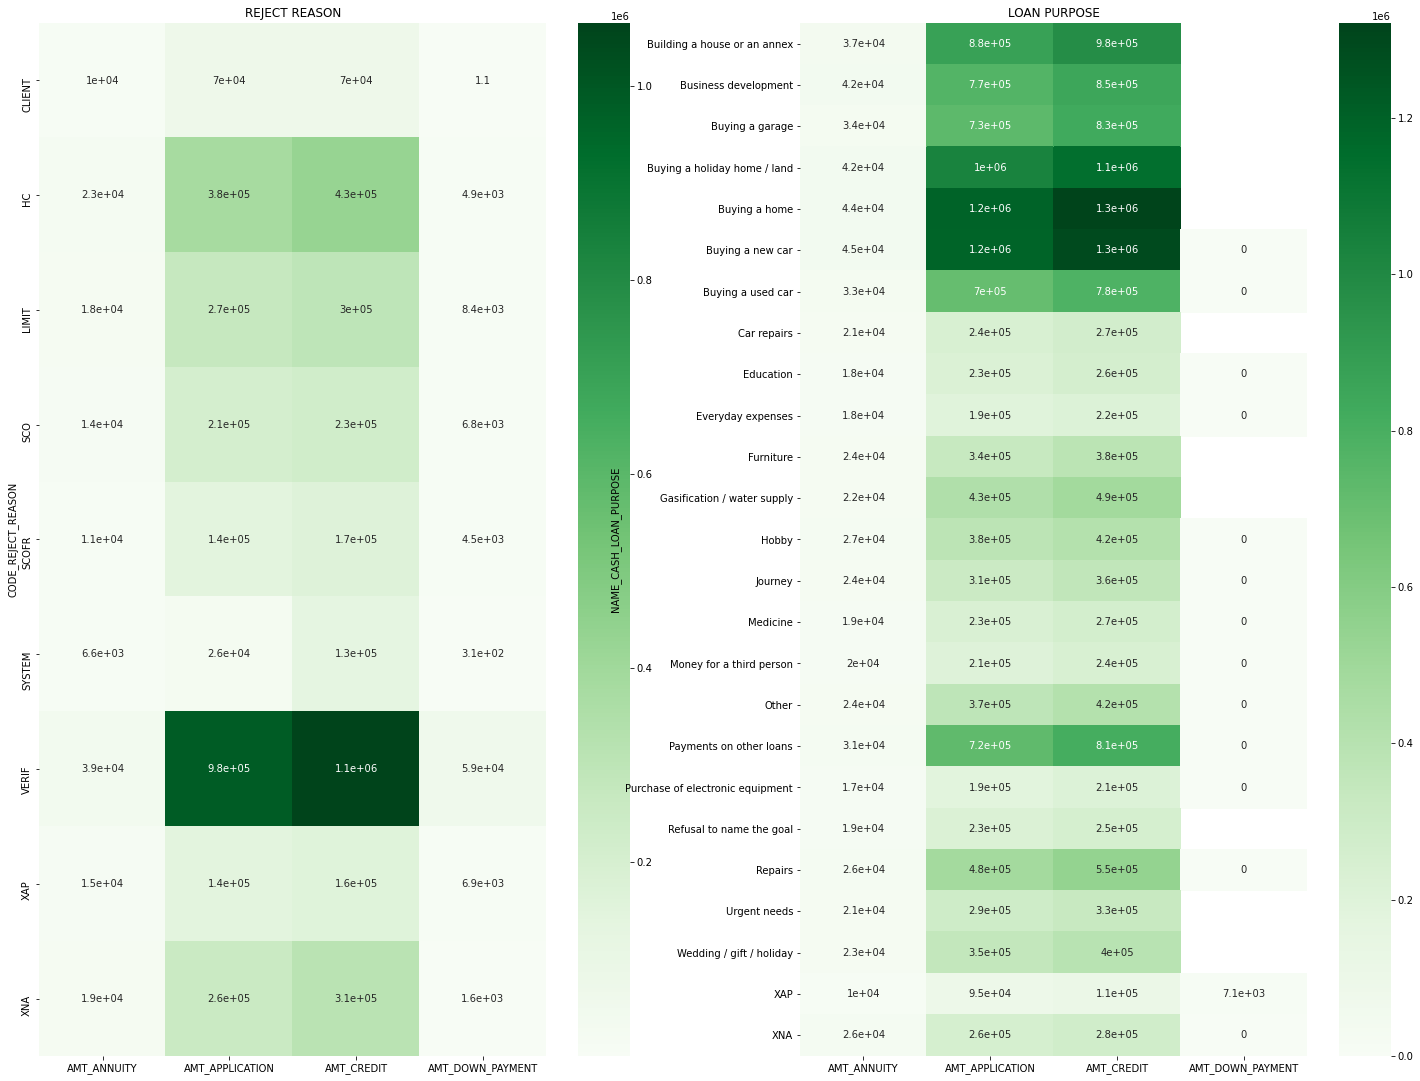

In [8]:
axes = plt.figure(figsize = (25,19))
plt.subplot(1,2,1)
ax=sns.heatmap(X, cmap='Greens', annot = True)
ax.set_title('REJECT REASON')
plt.subplot(1,2,2)
ax=sns.heatmap(Y, cmap='Greens', annot = True)
ax.set_title('LOAN PURPOSE')

Verification is the highest cause of rejection for these applications.
Buying a home and buying a new car are two highest causes for applications.

In [9]:
A= pd.pivot_table(test1, index = 'NAME_GOODS_CATEGORY', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])

B= pd.pivot_table(test1, index = 'NAME_SELLER_INDUSTRY', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])

C = pd.pivot_table(test1, index = 'NAME_CLIENT_TYPE', values = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_DOWN_PAYMENT'])





Text(0.5, 1.0, 'GOODS CATEGORY')

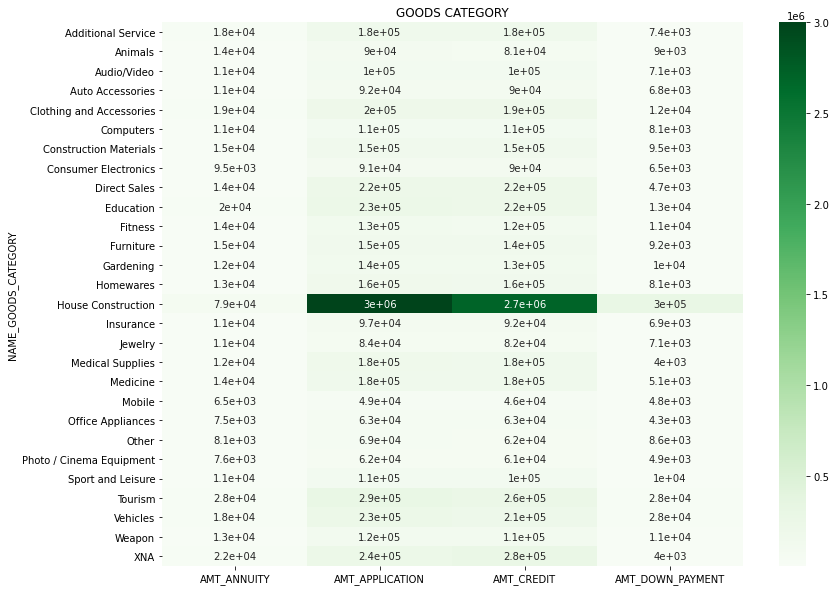

In [10]:
axes = plt.figure(figsize = (13,10))

ax=sns.heatmap(A, cmap='Greens', annot = True)
ax.set_title('GOODS CATEGORY')

House Construction is the single most densely packed category leading to applications, among various goods categories

Text(0.5, 1.0, 'SELLER INDUSTRY')

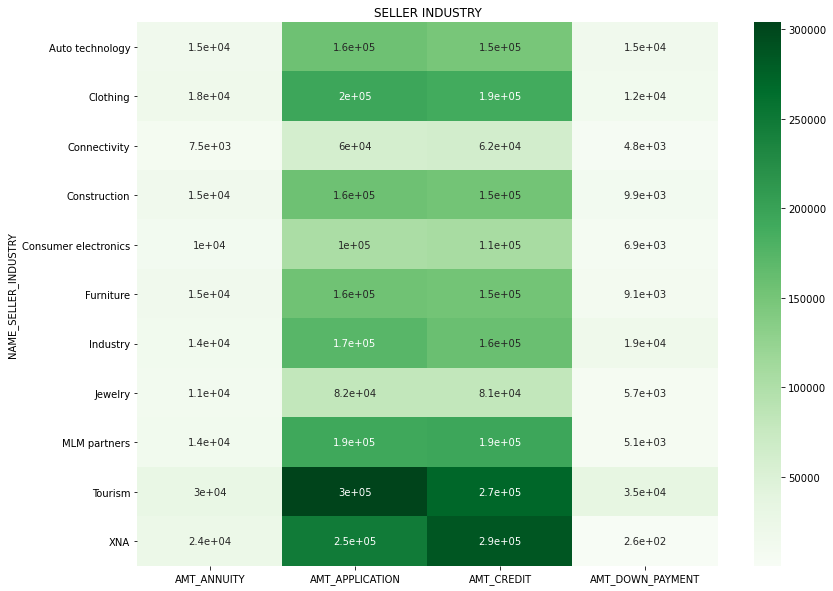

In [13]:
axes = plt.figure(figsize = (13,10))

ax=sns.heatmap(B, cmap='Greens', annot = True)
ax.set_title('SELLER INDUSTRY')

Tourism attracts a lot of attention for the customers. But there are also various uncategorized data,
that indicate customers spend large amounts on unique places.

Text(0.5, 1.0, 'CLIENT TYPE')

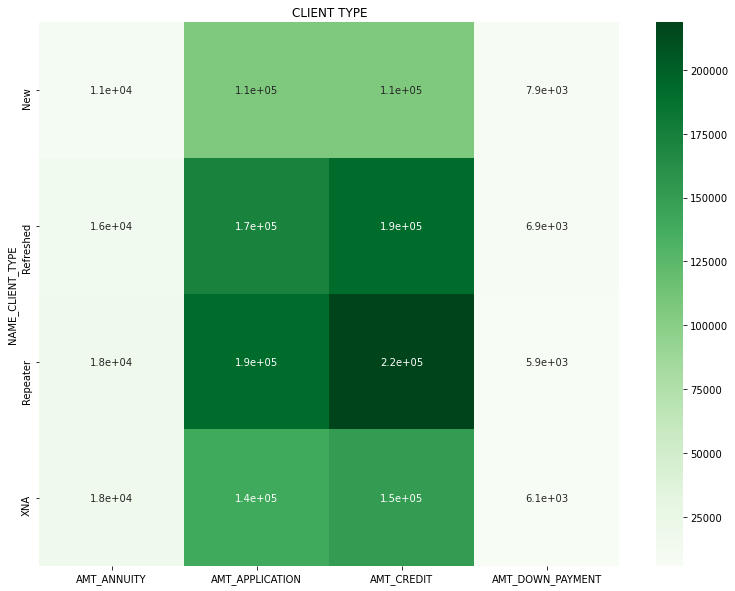

In [11]:
axes = plt.figure(figsize = (13,10))

ax=sns.heatmap(C, cmap='Greens', annot = True)
ax.set_title('CLIENT TYPE')

Repeater customers have the highest credit.  Followed by refreshed customers.

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='AMT_APPLICATION'>

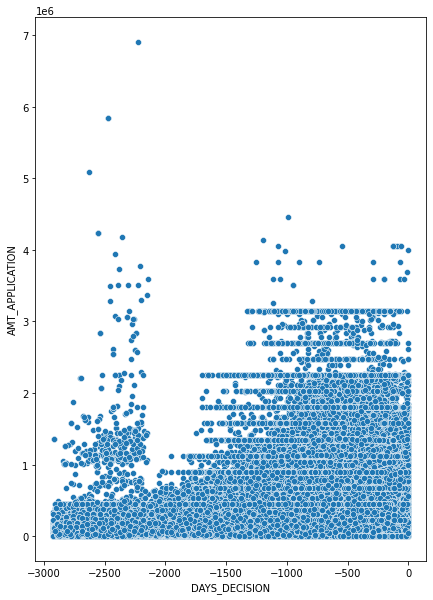

In [16]:
axes = plt.figure(figsize = (7,10))
sns.scatterplot(x='DAYS_DECISION',y='AMT_APPLICATION', data = test1)

Applications of higher amounts make take more time to take a decision about. BUt there seems to be some problem in this column, as even with absolute value, these are too many days in count. 